[Link Colab](https://colab.research.google.com/drive/1x56Ho-q47nDz9xDOwFcM6RYBlCD2CHTt?usp=sharing)

COba Delay

In [14]:
from google.colab import drive
drive.mount("/content/drive/MyDrive/Colab Notebooks/asset")

ValueError: ignored

In [15]:
pip install numpy scipy opencv-python matplotlib pywavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from google.colab.patches import cv2_imshow

# Load target image
target_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/asset/validation/Orf/1734.tif", cv2.IMREAD_GRAYSCALE)

# Load potential pathogen image
pathogen_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/asset/test/Orf/1721.tif", cv2.IMREAD_GRAYSCALE)

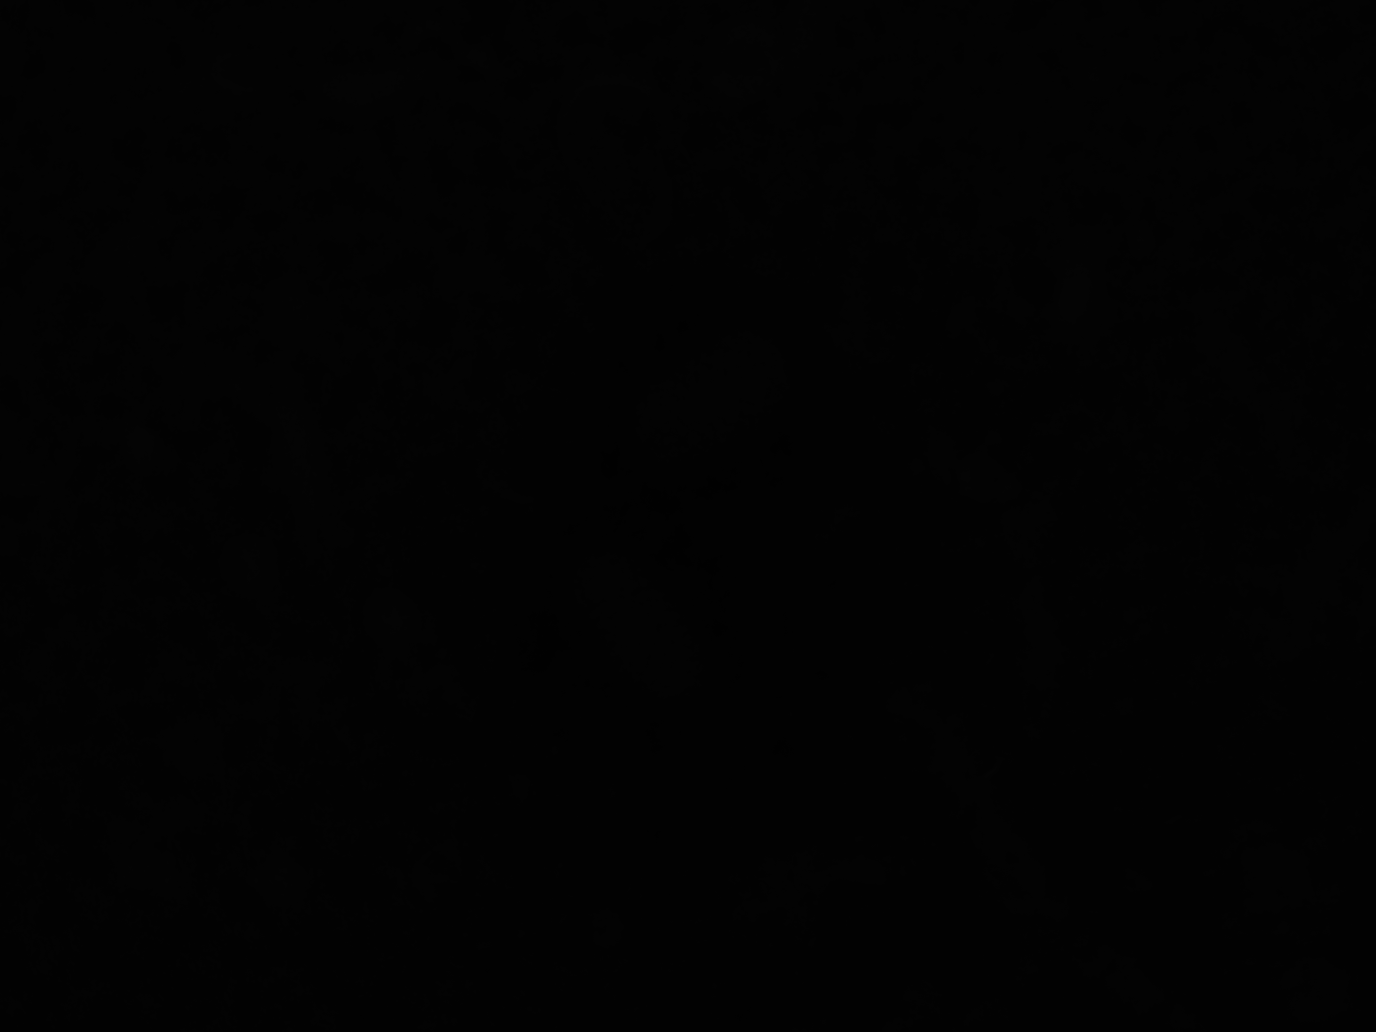

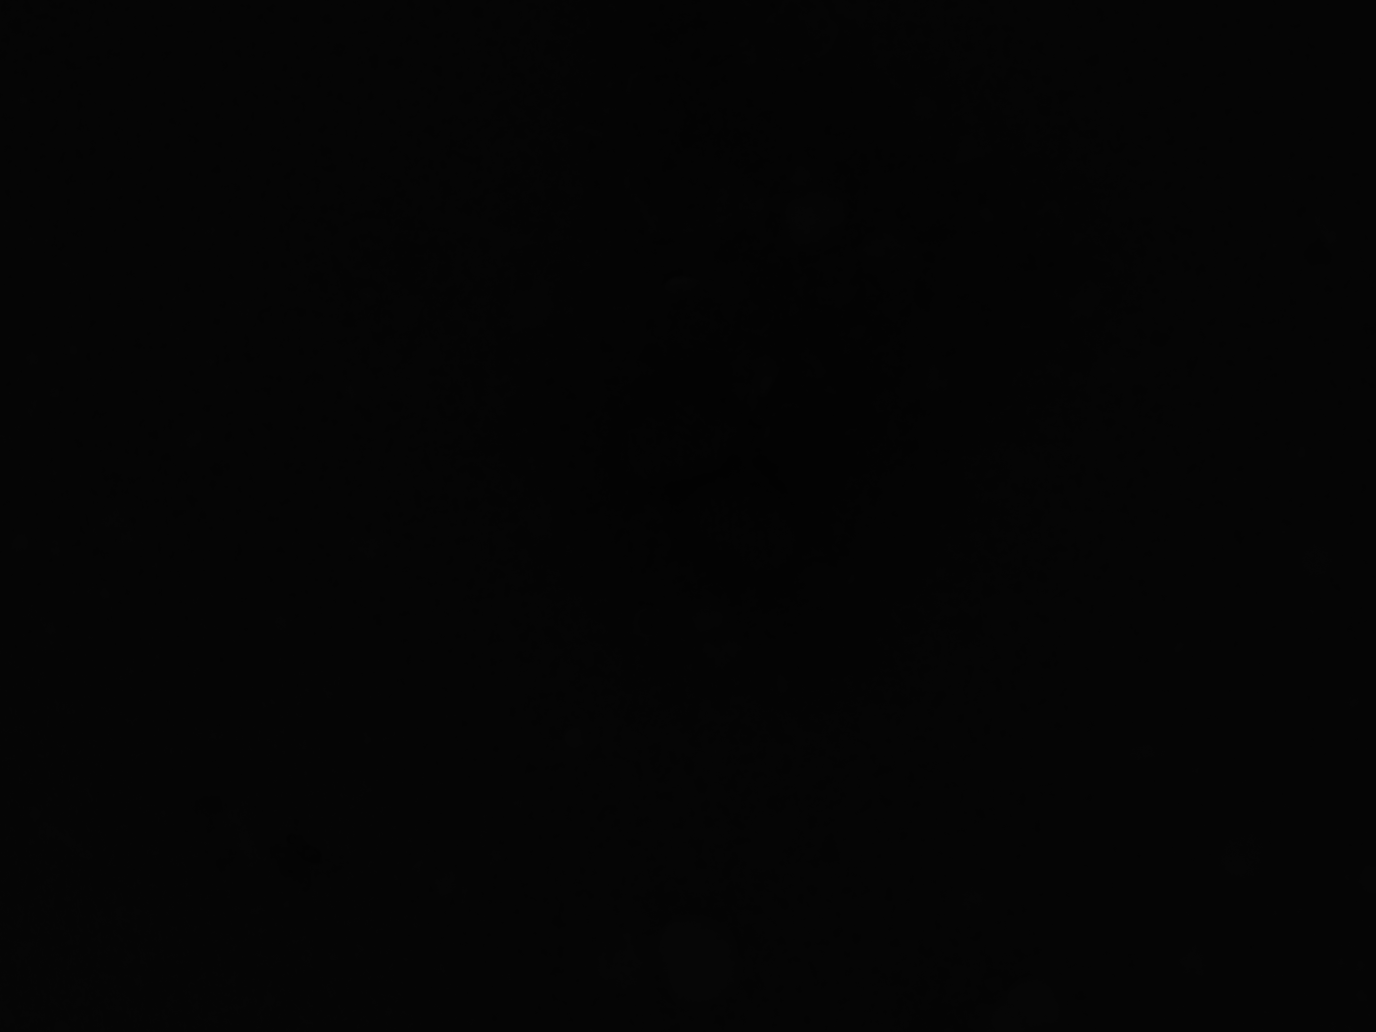

In [17]:
cv2_imshow(target_image)
cv2_imshow(pathogen_image)

In [18]:
# Perform DWT on target image
target_coeffs = pywt.dwt2(target_image, 'db1')

# Perform DWT on pathogen image
pathogen_coeffs = pywt.dwt2(pathogen_image, 'db1')

In [19]:
print(target_coeffs)

(array([[6. , 6. , 6. , ..., 4. , 4. , 4. ],
       [6. , 6. , 6. , ..., 4.5, 4. , 4. ],
       [6. , 6. , 6. , ..., 4.5, 4. , 4. ],
       ...,
       [4. , 4. , 4. , ..., 4. , 4. , 4. ],
       [4. , 4. , 4. , ..., 4. , 4. , 4. ],
       [4. , 4. , 4. , ..., 4. , 4. , 4. ]]), (array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]]), array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]]), array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..

In [20]:
cv2_imshow(pathogen_coeffs)

AttributeError: ignored

In [21]:
# Extract approximation coefficients (LL) from target image
target_LL = target_coeffs[0]

# Extract approximation coefficients (LL) from pathogen image
pathogen_LL = pathogen_coeffs[0]


In [22]:
# Perform template matching
# result = cv2.matchTemplate(target_LL, pathogen_LL, cv2.TM_CCOEFF_NORMED)

# Perform template matching
result = cv2.matchTemplate(np.uint8(target_LL), np.uint8(pathogen_LL), cv2.TM_CCOEFF_NORMED)


In [23]:
# Set a threshold for similarity
threshold = 0.8

# Locate the pathogen in the target image
locations = np.where(result >= threshold)


In [24]:
# Draw rectangles around the located pathogen
for loc in zip(*locations[::-1]):
    cv2.rectangle(target_image, loc, (loc[0] + pathogen_image.shape[1], loc[1] + pathogen_image.shape[0]), (0, 255, 0), 2)


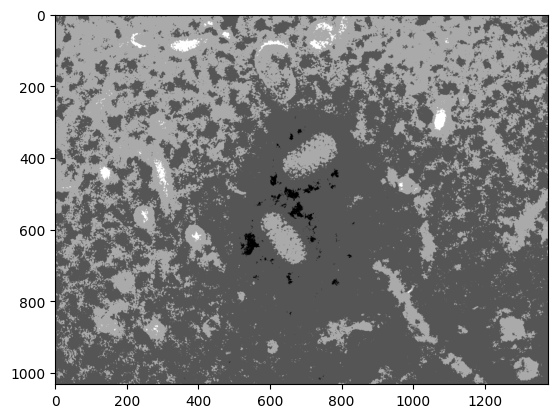

In [25]:
# Display the result
plt.imshow(target_image, cmap='gray')
plt.show()
